# Model Selection
## Amir A. Rahnama

In this tutorial, we are going to compare the relative performance of Machine Learning models "rigorously".

In [118]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.utils import resample
from mlxtend.evaluate import bootstrap_point632_score

In [15]:
df = pd.read_csv('heart.csv', delimiter=',')

In [18]:
df['cp'][df['cp'] == 0] = 'typical angina'
df['cp'][df['cp'] == 1] = 'atypical angina'
df['cp'][df['cp'] == 2] = 'non-anginal pain'
df['cp'][df['cp'] == 3] = 'asymptomatic'

df['restecg'][df['restecg'] == 0] = 'normal'
df['restecg'][df['restecg'] == 1] = 'ST-T wave abnormality'
df['restecg'][df['restecg'] == 2] = 'left ventricular hypertrophy'

df['slope'][df['slope'] == 0] = 'upsloping'
df['slope'][df['slope'] == 1] = 'flat'
df['slope'][df['slope'] == 2] = 'downsloping'

df['thal'][df['thal'] == 0] = '-'
df['thal'][df['thal'] == 1] = 'normal'
df['thal'][df['thal'] == 2] = 'fixed defect'
df['thal'][df['thal'] == 3] = 'reversable defect'
df_c = df.copy()
df = pd.get_dummies(df, drop_first=True)

<ipython-input-18-e5a483cbb38b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cp'][df['cp'] == 0] = 'typical angina'
<ipython-input-18-e5a483cbb38b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['restecg'][df['restecg'] == 0] = 'normal'
<ipython-input-18-e5a483cbb38b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['slope'][df['slope'] == 0] = 'upsloping'
<ipython-input-18-e5a483cbb38b>:11: SettingWithCopyWarning: 
A 

In [23]:
Y = df["target"]
X = df.drop(["target"],axis = 1)

### Holdout

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3 , random_state = 42)

In [208]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_ac = accuracy_score(Y_test,y_pred_rf)

In [209]:
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mlp_ac = accuracy_score(Y_test,y_pred_mlp)

/Users/amirrahnama/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [210]:
rf_ac

0.989010989010989

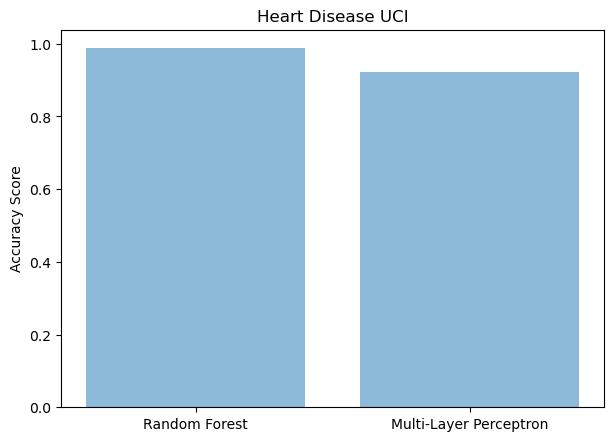

In [211]:
fig, ax = plt.subplots(1, 1, figsize=(7,5), dpi=100)

objects = ('Random Forest', 'Multi-Layer Perceptron')
y_pos = np.arange(len(objects))
performance = [rf_ac, mlp_ac]

ax.bar(y_pos, performance, align='center', alpha=0.5)
ax.set_xticks(y_pos)
ax.set_xticklabels(objects)
ax.set_ylabel('Accuracy Score')
ax.set_title('Heart Disease UCI')

plt.show()

### Repeated Holdout

In [172]:
rs = ShuffleSplit(n_splits=20, test_size=.5, random_state=0)
stats_rholdout_50 = {'rf': [], 'mlp': []}

for train_index, test_index in rs.split(X):
    rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X[train_index], y[train_index])
    y_pred_rf = rf.predict(X[test_index]) 
    rf_ac = accuracy_score(y[test_index], y_pred_rf) 
    stats_rholdout_50['rf'].append(rf_ac)

    mlp = MLPClassifier(random_state=1, max_iter=2000).fit(X[train_index], y[train_index])
    y_pred_mlp = mlp.predict(X[test_index])
    mlp_ac = accuracy_score(y[test_index], y_pred_mlp)
    
    stats_rholdout_50['mlp'].append(mlp_ac)

In [173]:
rs = ShuffleSplit(n_splits=20, test_size=.25, random_state=0)
stats_rholdout_25 = {'rf': [], 'mlp': []}

for train_index, test_index in rs.split(X):
    rf = RandomForestClassifier(max_depth=2, random_state=0).fit(X[train_index], y[train_index])
    y_pred_rf = rf.predict(X[test_index]) 
    rf_ac = accuracy_score(y[test_index], y_pred_rf) 
    stats_rholdout_25['rf'].append(rf_ac)

    mlp = MLPClassifier(random_state=1, max_iter=2000).fit(X[train_index], y[train_index])
    y_pred_mlp = mlp.predict(X[test_index])
    mlp_ac = accuracy_score(y[test_index], y_pred_mlp)
    
    stats_rholdout_25['mlp'].append(mlp_ac)

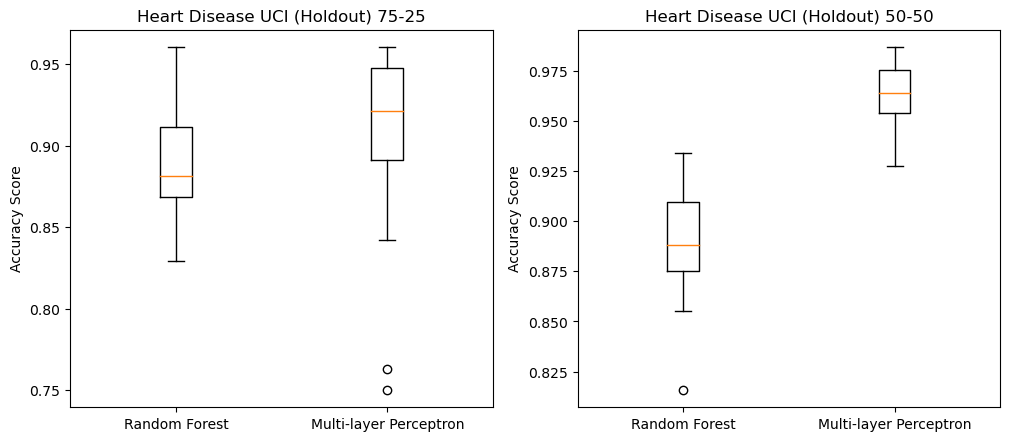

In [174]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=100)
ax[0].boxplot([stats_rholdout_25['rf'], stats_rholdout_25['mlp']])
ax[0].set_xticklabels(['Random Forest', 'Multi-layer Perceptron'])
ax[0].set_ylabel('Accuracy Score')
ax[0].set_title('Heart Disease UCI (Holdout) 75-25')

ax[1].boxplot([stats_rholdout_50['rf'], stats_rholdout_50['mlp']])
ax[1].set_xticklabels(['Random Forest', 'Multi-layer Perceptron'])
ax[1].set_ylabel('Accuracy Score')
ax[1].set_title('Heart Disease UCI (Holdout) 50-50')


plt.show()

In [214]:
np.mean(stats_rholdout_50['rf']), np.mean(stats_rholdout_50['mlp'])

(0.8904605263157895, 0.9638157894736841)

In [183]:
lower_rf = np.percentile(stats_rholdout_50['rf'], 2.5)
upper_rf = np.percentile(stats_rholdout_50['rf'], 97.5)
print('95%% Confidence interval: [%.2f, %.2f]' % (100*lower_rf, 100*upper))

95% Confidence interval: [83.45, 94.55]


### Bootstrap resampling

In [190]:
n_iterations = 50 
n_size = int(len(data) * 0.5)

stats_50 = {'rf': [], 'mlp': []}

for i in range(n_iterations):

    train = resample(values, n_samples = n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) 

    rf = RandomForestClassifier(max_depth=2, random_state=0).fit(train[:,:-1], train[:,-1])
    y_pred_rf = rf.predict(test[:,:-1]) 
    rf_ac = accuracy_score(test[:,-1], y_pred_rf) 
    stats_50['rf'].append(rf_ac)

    mlp = MLPClassifier(random_state=1, max_iter=2000).fit(train[:,:-1], train[:,-1])
    y_pred_mlp = mlp.predict(test[:,:-1])
    mlp_ac = accuracy_score(test[:,-1] , y_pred_mlp)
    
    stats_50['mlp'].append(mlp_ac)

In [191]:
n_iterations = 50 
n_size = int(len(data) * 0.7)

stats_70 = {'rf': [], 'mlp': []}

for i in range(n_iterations):

    train = resample(values, n_samples = n_size) 
    test = np.array([x for x in values if x.tolist() not in train.tolist()]) 

    rf = RandomForestClassifier(max_depth=2, random_state=0).fit(train[:,:-1], train[:,-1])
    y_pred_rf = rf.predict(test[:,:-1]) 
    rf_ac = accuracy_score(test[:,-1], y_pred_rf) 
    stats_70['rf'].append(rf_ac)

    mlp = MLPClassifier(random_state=1, max_iter=2000).fit(train[:,:-1], train[:,-1])
    y_pred_mlp = mlp.predict(test[:,:-1])
    mlp_ac = accuracy_score(test[:,-1] , y_pred_mlp)
    
    stats_70['mlp'].append(mlp_ac)

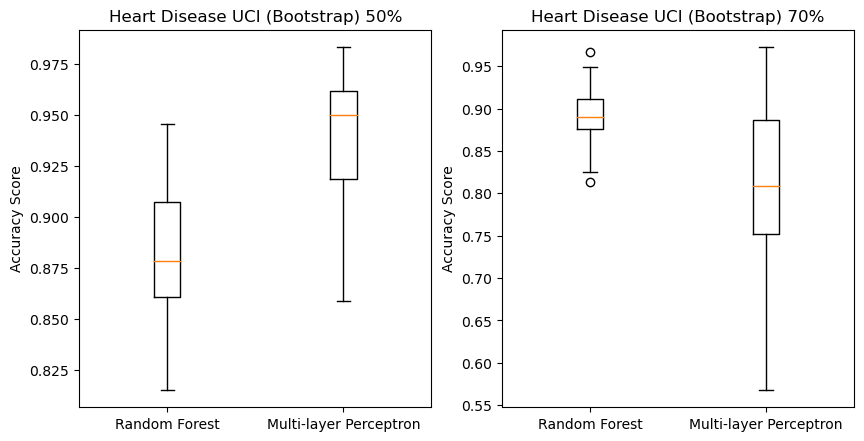

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=100)

ax[0].boxplot([stats_50['rf'], stats_50['mlp']])
ax[0].set_xticklabels(['Random Forest', 'Multi-layer Perceptron'])
ax[0].set_ylabel('Accuracy Score')
ax[0].set_title('Heart Disease UCI (Bootstrap) 50%')


ax[1].boxplot([stats_70['rf'], stats_70['mlp']])
ax[1].set_xticklabels(['Random Forest', 'Multi-layer Perceptron'])
ax[1].set_ylabel('Accuracy Score')
ax[1].set_title('Heart Disease UCI (Bootstrap) 70%')

plt.show()

In [216]:
np.mean(stats_50['rf']), np.mean(stats_50['mlp'])

(0.8827879622660683, 0.9377683339168315)

In [196]:
a = 0.95 
p = ((1.0 - a)/2.0) * 100 
lower_rf = max(0.0, np.percentile(stats_50['rf'],p))
p = (a + ((1.0 - a)/ 2.0)) * 100 
upper_rf = min(1.0, np.percentile(stats_50['rf'],p))
print('RF %.1f confidence interval %.1f%% and %.1f%%' %(a*100, lower_rf*100, upper_rf*100))

RF 95.0 confidence interval 82.3% and 93.0%


In [197]:
a = 0.95 
p = ((1.0 - a)/2.0) * 100 
lower_mlp = max(0.0, np.percentile(stats_50['mlp'],p))
p = (a + ((1.0 - a)/ 2.0)) * 100 
upper_mlp = min(1.0, np.percentile(stats_50['mlp'],p))
print('MLP %.1f confidence interval %.1f%% and %.1f%%' %(a*100, lower_mlp*100, upper_mlp*100))

MLP 95.0 confidence interval 87.6% and 97.7%


### 0.632 Bootstrap 

In [106]:
X = df.values[:,:-1]
y = df.values[:,-1]

In [114]:
rf = RandomForestClassifier(max_depth=2, random_state=0).fit(train[:,:-1], train[:,-1])
rf_scores_0632 = bootstrap_point632_score(rf, X, y, method='oob')

In [223]:
rf_scores_0632_lower = np.percentile(rf_scores_0632, 2.5)
rf_scores_0632_upper = np.percentile(rf_scores_0632, 97.5)
print('RF 95%% Confidence interval (0.632): [%.2f, %.2f]' % (100*rf_scores_0632_lower, 100*rf_scores_0632_upper))

RF 95% Confidence interval (0.632): [81.81, 94.79]


In [110]:
mlp = MLPClassifier(random_state=1, max_iter=1000)
mlp_scores_0632 = bootstrap_point632_score(mlp, X, y, method='oob')

/Users/amirrahnama/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [219]:
np.mean(rf_scores_0632), np.mean(mlp_scores_0632)

(0.8865264782492689, 0.9719780902692117)

In [222]:
mlp_scores_0632_lower = np.percentile(mlp_scores_0632, 2.5)
mlp_scores_0632_upper = np.percentile(mlp_scores_0632, 97.5)
print('MLP 95%% Confidence interval (0.632): [%.2f, %.2f]' % (100*mlp_scores_0632_lower, 100*mlp_scores_0632_upper))

MLP 95% Confidence interval (0.632): [91.81, 99.17]


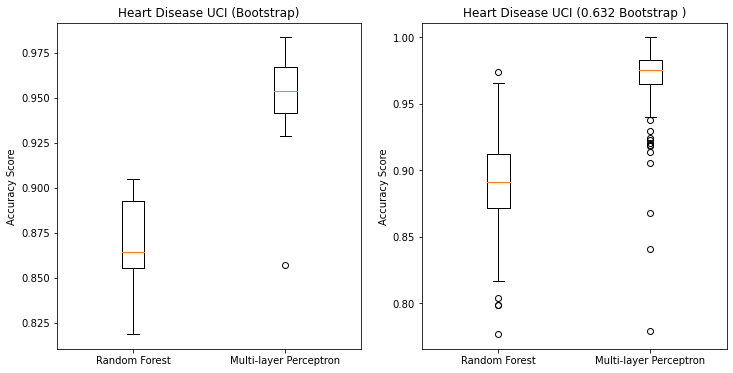

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].boxplot([stats['rf'], stats['mlp']])
ax[0].set_xticklabels(['Random Forest', 'Multi-layer Perceptron'])
ax[0].set_ylabel('Accuracy Score')
ax[0].set_title('Heart Disease UCI (Bootstrap)')

ax[1].boxplot([rf_scores_0632, mlp_scores_0632])
ax[1].set_xticklabels(['Random Forest', 'Multi-layer Perceptron'])
ax[1].set_ylabel('Accuracy Score')
ax[1].set_title('Heart Disease UCI (0.632 Bootstrap )')

plt.show()